# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_renda = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
df_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [42]:
#df_renda_f = df_renda.query('renda < 20000') 
#df_renda_f.head()

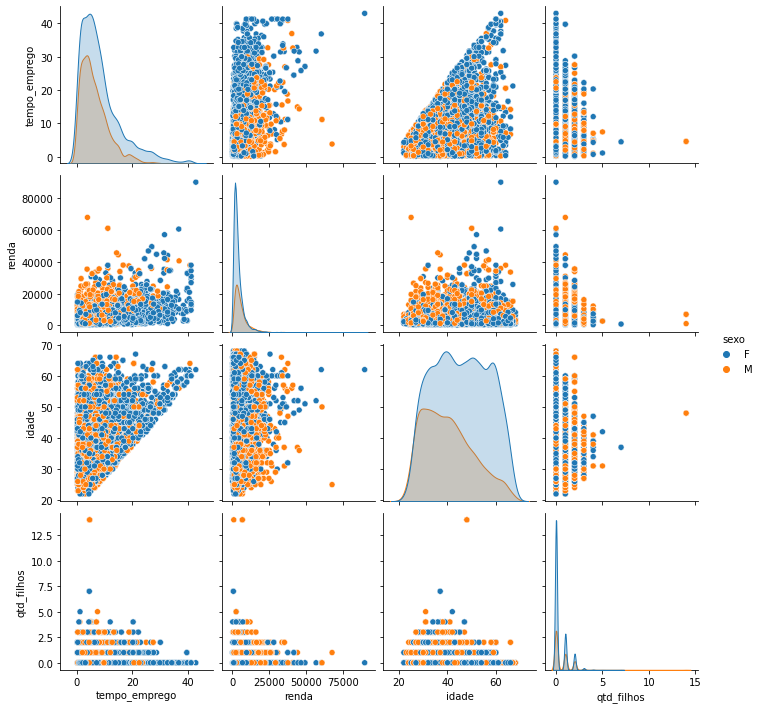

In [3]:
df1 = df_renda[['tempo_emprego','renda','sexo','idade','qtd_filhos']]
sns.pairplot(df1, hue= 'sexo')

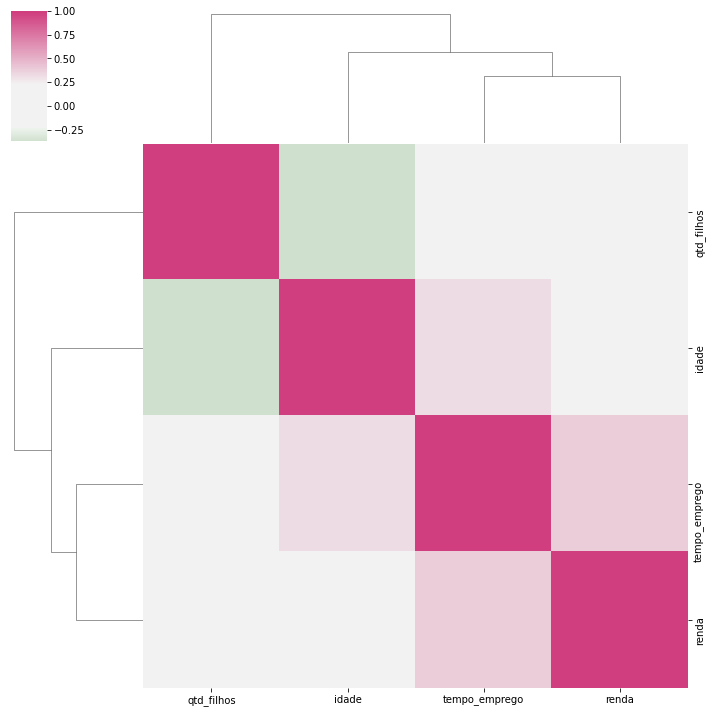

In [61]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df1.corr(), figsize=(10, 10), center = 0, cmap=cmap)

,qt_pessoas_residencia,renda
qt_pessoas_residencia,1.000000,0.020977
renda,0.020977,1.000000


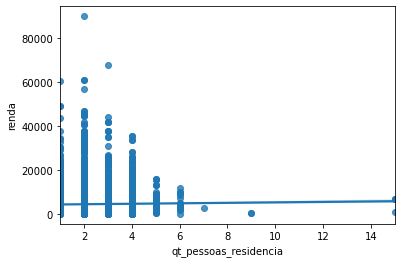

In [5]:
df1 = df_renda[['qt_pessoas_residencia','renda']]
_ = sns.regplot(x = 'qt_pessoas_residencia', y ='renda', data = df1)
df1.corr()

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


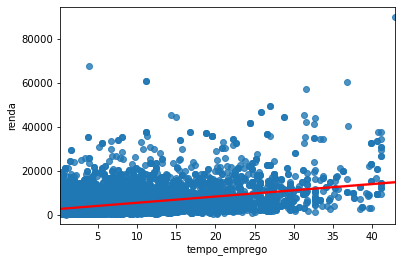

In [8]:
df1 = df_renda[['tempo_emprego','renda']]
_ = sns.regplot(x = 'tempo_emprego', y ='renda', data = df1, line_kws = {'color': 'red'})
df1.corr()

,tempo_emprego,idade
tempo_emprego,1.000000,0.323934
idade,0.323934,1.000000


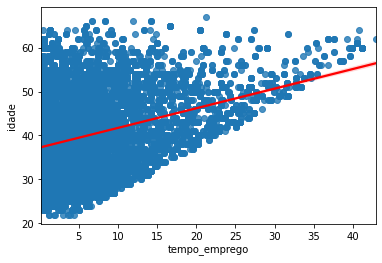

In [9]:
df1 = df_renda[['tempo_emprego','idade']]
_ = sns.regplot(x = 'tempo_emprego', y ='idade', data = df1, line_kws = {'color': 'red'})
df1.corr()

,idade,renda
idade,1.00000,0.04257
renda,0.04257,1.00000


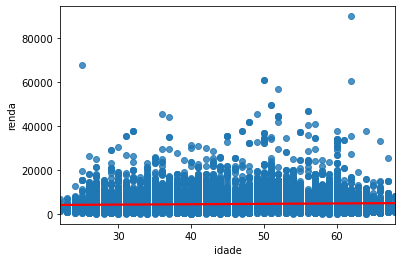

In [11]:
df1 = df_renda[['idade','renda']]
_ = sns.regplot(x = 'idade', y ='renda', data = df1,  line_kws = {'color': 'red'})
df1.corr()

,qtd_filhos,renda
qtd_filhos,1.000000,0.009567
renda,0.009567,1.000000


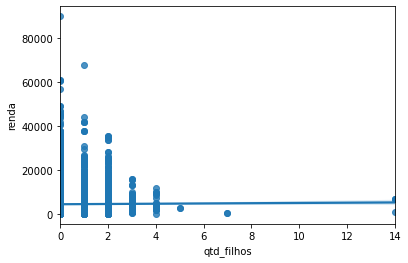

In [12]:
df1 = df_renda[['qtd_filhos','renda']]
_ = sns.regplot(x = 'qtd_filhos', y ='renda', data = df1)
df1.corr()

### De acordo com as análises acima os padrões que fizeram mais sentido foram:
#### - Tempo de emprego e renda: no sentido de que quanto maior o tempo de emprego maior a renda recebida pelo empregado. Tendo uma correlação de 0.39
#### - Tempo de emprego e idade: Quanto maior o tempo de emprego maior a idade. Tendo uma correlação de 0.32, interessante foi observar que apenas pelo meu insight esta correlação seria maior que a emprego por renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

#### Variáveis (Tempo_emprego e Renda)

<AxesSubplot:>

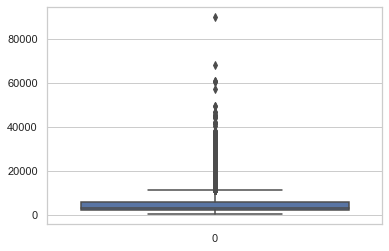

In [83]:
df1 = df_renda[['tempo_emprego','renda']]

#df1 = df1.loc[df1['renda']<=40000]


sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df1['renda'])



<AxesSubplot:>

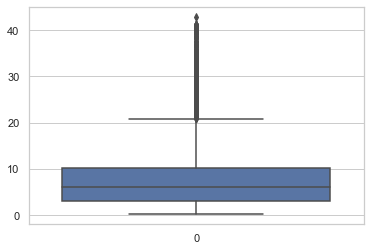

In [84]:
sns.boxplot(data=df1['tempo_emprego'])

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


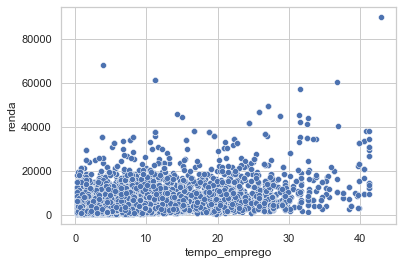

In [85]:
sns.scatterplot(x = 'tempo_emprego', y ='renda', data = df1)
df1.corr()

### Variáveis (Idade e Renda)

<AxesSubplot:>

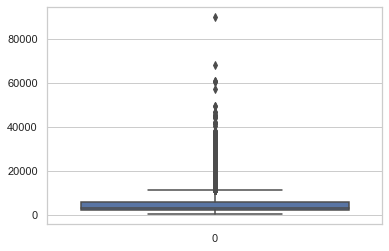

In [97]:
df2 = df_renda[['idade','renda']]

sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df2['renda'])


<AxesSubplot:>

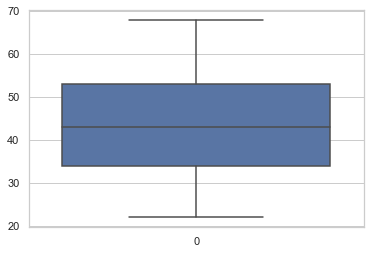

In [98]:
sns.boxplot(data=df2['idade'])

,idade,renda
idade,1.00000,0.04257
renda,0.04257,1.00000


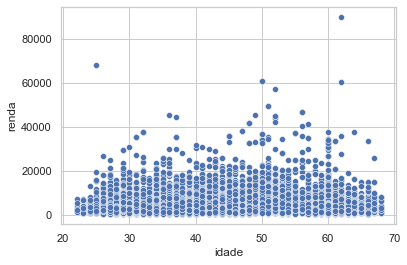

In [100]:
sns.scatterplot(x = 'idade', y ='renda', data = df2)
df2.corr()

3) Na su aopinião, há outliers na variável renda?

#### Na minha opinião sim há outliers na variável renda, apesar dos valores e as quantidades de pessoas com a renda muito alta serem compatíveis, ou seja não acho que ocorreu um erro na base. (Exemplo: a renda de 89.918,04) 

In [88]:
df1[df1['renda']> 60000]

,tempo_emprego,renda
113,3.849315,67794.54
7078,11.189041,60965.51
7765,36.753425,60475.59
9028,11.189041,60965.51
9934,42.906849,89918.04


4) Calcule o logaritmo da variável renda e repita a sequência de análise

<AxesSubplot:xlabel='tempo_emprego', ylabel='logy'>

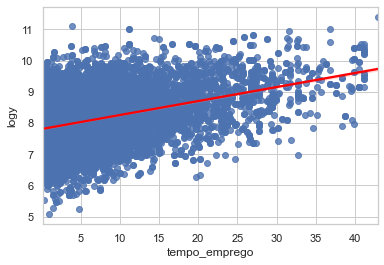

In [94]:
df1_log = df1.copy()
df1_log['logy'] = np.log(df1_log['renda'])

sns.regplot(x = 'tempo_emprego', y ='logy', data = df1_log ,  line_kws = {'color': 'red'} )

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

#### A aplicação do LOG melhorou a análise, fica mais visível a correlação entre as variáveis.